# Прогнозирование направления изменения курса USD/RUB на один день вперед

In [7]:
import pandas as pd

In [8]:
usdrub_df = pd.read_csv('data/USDRUB_TOM.csv')

In [9]:
usdrub_df.rename(columns={'<TICKER>': 'TICKER', '<PER>': 'PER', '<DATE>': 'DATE', '<TIME>': 'TIME', '<OPEN>': 'OPEN', '<HIGH>': 'HIGH', '<LOW>': 'LOW', '<CLOSE>': 'CLOSE', '<VOL>': 'VOL'}, inplace=True)
usdrub_df

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,USD000UTSTOM [CETS],Daily,20030415,0,31.1850,31.1975,31.1850,31.1970,36311.0
1,USD000UTSTOM [CETS],Daily,20030416,0,31.1950,31.1950,31.1850,31.1885,23372.0
2,USD000UTSTOM [CETS],Daily,20030417,0,31.1800,31.2000,31.1700,31.1975,60261.0
3,USD000UTSTOM [CETS],Daily,20030418,0,31.1975,31.1975,31.1800,31.1801,33785.0
4,USD000UTSTOM [CETS],Daily,20030421,0,31.1065,31.1100,31.1000,31.1025,16609.0
...,...,...,...,...,...,...,...,...,...
3794,USD000UTSTOM [CETS],Daily,20210506,0,74.8400,74.9000,74.2000,74.2300,2187468.0
3795,USD000UTSTOM [CETS],Daily,20210507,0,73.9625,74.5500,72.0025,73.7850,2764362.0
3796,USD000UTSTOM [CETS],Daily,20210510,0,73.7850,74.3575,73.5125,74.3500,1031307.0
3797,USD000UTSTOM [CETS],Daily,20210511,0,74.3050,74.4250,73.8200,74.1100,2343062.0


In [10]:
usdrub_df = usdrub_df.drop(['TICKER', 'PER', 'TIME'], axis=1)
usdrub_df

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,20030415,31.1850,31.1975,31.1850,31.1970,36311.0
1,20030416,31.1950,31.1950,31.1850,31.1885,23372.0
2,20030417,31.1800,31.2000,31.1700,31.1975,60261.0
3,20030418,31.1975,31.1975,31.1800,31.1801,33785.0
4,20030421,31.1065,31.1100,31.1000,31.1025,16609.0
...,...,...,...,...,...,...
3794,20210506,74.8400,74.9000,74.2000,74.2300,2187468.0
3795,20210507,73.9625,74.5500,72.0025,73.7850,2764362.0
3796,20210510,73.7850,74.3575,73.5125,74.3500,1031307.0
3797,20210511,74.3050,74.4250,73.8200,74.1100,2343062.0


In [11]:
usdrub_df.columns = ['DATE', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'CLOSE_cur', 'VOL_cur']
usdrub_df

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur
0,20030415,31.1850,31.1975,31.1850,31.1970,36311.0
1,20030416,31.1950,31.1950,31.1850,31.1885,23372.0
2,20030417,31.1800,31.2000,31.1700,31.1975,60261.0
3,20030418,31.1975,31.1975,31.1800,31.1801,33785.0
4,20030421,31.1065,31.1100,31.1000,31.1025,16609.0
...,...,...,...,...,...,...
3794,20210506,74.8400,74.9000,74.2000,74.2300,2187468.0
3795,20210507,73.9625,74.5500,72.0025,73.7850,2764362.0
3796,20210510,73.7850,74.3575,73.5125,74.3500,1031307.0
3797,20210511,74.3050,74.4250,73.8200,74.1100,2343062.0


In [12]:
usdrub_df['DATE'] = pd.to_datetime(usdrub_df['DATE'], format='%Y%m%d')
usdrub_df

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur
0,2003-04-15,31.1850,31.1975,31.1850,31.1970,36311.0
1,2003-04-16,31.1950,31.1950,31.1850,31.1885,23372.0
2,2003-04-17,31.1800,31.2000,31.1700,31.1975,60261.0
3,2003-04-18,31.1975,31.1975,31.1800,31.1801,33785.0
4,2003-04-21,31.1065,31.1100,31.1000,31.1025,16609.0
...,...,...,...,...,...,...
3794,2021-05-06,74.8400,74.9000,74.2000,74.2300,2187468.0
3795,2021-05-07,73.9625,74.5500,72.0025,73.7850,2764362.0
3796,2021-05-10,73.7850,74.3575,73.5125,74.3500,1031307.0
3797,2021-05-11,74.3050,74.4250,73.8200,74.1100,2343062.0


In [13]:
usdrub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       3799 non-null   datetime64[ns]
 1   OPEN_cur   3799 non-null   float64       
 2   HIGH_cur   3799 non-null   float64       
 3   LOW_cur    3799 non-null   float64       
 4   CLOSE_cur  3799 non-null   float64       
 5   VOL_cur    3799 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 178.2 KB


In [14]:
usdrub_df = usdrub_df[(usdrub_df.DATE > '2015-01-01')]
usdrub_df

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur
2199,2015-01-05,59.1885,61.1900,57.5160,60.850,599001.0
2200,2015-01-06,60.3995,64.1650,60.1045,63.240,1023300.0
2201,2015-01-08,63.2895,63.2895,59.4650,60.301,783073.0
2202,2015-01-09,60.1805,62.1500,59.5000,61.550,654867.0
2203,2015-01-12,62.0005,63.4540,62.0005,63.170,2591977.0
...,...,...,...,...,...,...
3794,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0
3795,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0
3796,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0
3797,2021-05-11,74.3050,74.4250,73.8200,74.110,2343062.0


In [15]:
def currency_movement(row):
    return row['CLOSE_cur'] - row['OPEN_cur']

def currency_spread(row):
    return row['HIGH_cur'] - row['LOW_cur']

In [16]:
usdrub_df['MOVEMENT_cur'] = usdrub_df.apply(currency_movement, axis=1)
usdrub_df['SPREAD_cur'] = usdrub_df.apply(currency_spread, axis=1)

usdrub_df

/var/folders/w3/c4hctmvs761f45z1y1jz7x3m0000gq/T/ipykernel_76085/3121746664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdrub_df['MOVEMENT_cur'] = usdrub_df.apply(currency_movement, axis=1)
/var/folders/w3/c4hctmvs761f45z1y1jz7x3m0000gq/T/ipykernel_76085/3121746664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdrub_df['SPREAD_cur'] = usdrub_df.apply(currency_spread, axis=1)


,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur
2199,2015-01-05,59.1885,61.1900,57.5160,60.850,599001.0,1.6615,3.6740
2200,2015-01-06,60.3995,64.1650,60.1045,63.240,1023300.0,2.8405,4.0605
2201,2015-01-08,63.2895,63.2895,59.4650,60.301,783073.0,-2.9885,3.8245
2202,2015-01-09,60.1805,62.1500,59.5000,61.550,654867.0,1.3695,2.6500
2203,2015-01-12,62.0005,63.4540,62.0005,63.170,2591977.0,1.1695,1.4535
...,...,...,...,...,...,...,...,...
3794,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0,-0.6100,0.7000
3795,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0,-0.1775,2.5475
3796,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0,0.5650,0.8450
3797,2021-05-11,74.3050,74.4250,73.8200,74.110,2343062.0,-0.1950,0.6050


In [17]:
usdrub_close_df = usdrub_df.filter(items = ['DATE', 'CLOSE_cur'])
usdrub_close_df

,DATE,CLOSE_cur
2199,2015-01-05,60.850
2200,2015-01-06,63.240
2201,2015-01-08,60.301
2202,2015-01-09,61.550
2203,2015-01-12,63.170
...,...,...
3794,2021-05-06,74.230
3795,2021-05-07,73.785
3796,2021-05-10,74.350
3797,2021-05-11,74.110


In [18]:
for i in range(1, 11):
    usdrub_close_df["lag_{}".format(i)] = usdrub_close_df.CLOSE_cur.shift(i)

In [19]:
usdrub_close_df

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
2199,2015-01-05,60.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2200,2015-01-06,63.240,60.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2201,2015-01-08,60.301,63.240,60.8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2202,2015-01-09,61.550,60.301,63.2400,60.8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2203,2015-01-12,63.170,61.550,60.3010,63.2400,60.8500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3794,2021-05-06,74.230,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000
3795,2021-05-07,73.785,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175
3796,2021-05-10,74.350,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800
3797,2021-05-11,74.110,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700


In [20]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import settings

In [21]:
usdrub_close_df = usdrub_close_df[(usdrub_close_df.DATE > '2015-10-15')]
usdrub_close_df

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
2396,2015-10-16,61.285,61.403,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490,66.0120
2397,2015-10-19,62.262,61.285,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490
2398,2015-10-20,62.115,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300
2399,2015-10-21,63.005,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640
2400,2015-10-22,62.591,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700
...,...,...,...,...,...,...,...,...,...,...,...,...
3794,2021-05-06,74.230,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000
3795,2021-05-07,73.785,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175
3796,2021-05-10,74.350,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800
3797,2021-05-11,74.110,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700


In [22]:
import numpy as np

In [23]:
usdrub_close_drop_close_df = usdrub_close_df.drop(['CLOSE_cur', 'DATE'], axis = 1)
usdrub_close_drop_close_df

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
2396,61.403,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490,66.0120
2397,61.285,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490
2398,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300
2399,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640
2400,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700
...,...,...,...,...,...,...,...,...,...,...
3794,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000
3795,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175
3796,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800
3797,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700


In [24]:
data_long = pd.DataFrame({0: usdrub_close_drop_close_df.values.flatten(),
                          1: np.arange(usdrub_close_drop_close_df.shape[0]).repeat(usdrub_close_drop_close_df.shape[1])})
data_long

,0,1
0,61.4030,0
1,62.7090,0
2,63.0390,0
3,62.2750,0
4,61.8760,0
...,...,...
14025,74.8425,1402
14026,75.2100,1402
14027,74.6350,1402
14028,74.4125,1402


In [25]:
settings_minimal = settings.MinimalFCParameters()
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [26]:
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_minimal)
settings_time

{'linear_trend_timewise': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}, {'attr': 'stderr'}], 'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [27]:
X = extract_features(
    data_long, column_id=1, 
    impute_function=impute, 
    default_fc_parameters=settings_time,
    n_jobs=2
)

X 

Feature Extraction: 100%|


,0__sum_values,0__median,0__mean,0__length,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,629.4270,62.68650,62.94270,10.0,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,624.7000,62.46950,62.47000,10.0,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,622.2130,62.26850,62.22130,10.0,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,620.9980,62.18850,62.09980,10.0,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,621.3390,62.18850,62.13390,10.0,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...,...
1398,750.8175,74.93000,75.08175,10.0,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1399,748.4475,74.87500,74.84475,10.0,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1400,746.8150,74.85125,74.68150,10.0,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850
1401,746.1850,74.73875,74.61850,10.0,0.402006,0.161609,74.619583,75.2100,75.2100,73.7850


In [28]:
X = X.drop(['0__length'], axis = 1)
X

,0__sum_values,0__median,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,629.4270,62.68650,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,624.7000,62.46950,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,622.2130,62.26850,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,620.9980,62.18850,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,621.3390,62.18850,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...
1398,750.8175,74.93000,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1399,748.4475,74.87500,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1400,746.8150,74.85125,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850
1401,746.1850,74.73875,74.61850,0.402006,0.161609,74.619583,75.2100,75.2100,73.7850


In [29]:
usdrub_close_df.reset_index(drop=True, inplace=True)
usdrub_close_df

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
0,2015-10-16,61.285,61.403,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490,66.0120
1,2015-10-19,62.262,61.285,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490
2,2015-10-20,62.115,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300
3,2015-10-21,63.005,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640
4,2015-10-22,62.591,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700
...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2021-05-06,74.230,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000
1399,2021-05-07,73.785,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175
1400,2021-05-10,74.350,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800
1401,2021-05-11,74.110,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700


In [30]:
usdrub_and_x = pd.concat([usdrub_close_df, X], axis=1)
usdrub_and_x

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_10,0__sum_values,0__median,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,2015-10-16,61.285,61.403,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,66.0120,629.4270,62.68650,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,2015-10-19,62.262,61.285,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,64.7490,624.7000,62.46950,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,2015-10-20,62.115,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,63.3300,622.2130,62.26850,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,2015-10-21,63.005,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,62.6640,620.9980,62.18850,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,2015-10-22,62.591,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,61.3700,621.3390,62.18850,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2021-05-06,74.230,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,...,76.6000,750.8175,74.93000,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1399,2021-05-07,73.785,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,...,75.4175,748.4475,74.87500,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1400,2021-05-10,74.350,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,...,74.9800,746.8150,74.85125,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850
1401,2021-05-11,74.110,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,...,74.9700,746.1850,74.73875,74.61850,0.402006,0.161609,74.619583,75.2100,75.2100,73.7850


In [31]:
usdrub_all_data = usdrub_df.merge(usdrub_and_x.drop(['CLOSE_cur'], axis=1), on='DATE', how='inner')
usdrub_all_data

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,lag_1,lag_2,...,lag_10,0__sum_values,0__median,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,2015-10-16,60.9450,62.1280,60.9450,61.285,4733982.0,0.3400,1.1830,61.403,62.7090,...,66.0120,629.4270,62.68650,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,2015-10-19,61.2990,62.4270,61.1500,62.262,4354840.0,0.9630,1.2770,61.285,61.4030,...,64.7490,624.7000,62.46950,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,2015-10-20,62.4030,62.4030,61.6600,62.115,4652025.0,-0.2880,0.7430,62.262,61.2850,...,63.3300,622.2130,62.26850,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,2015-10-21,62.2450,63.1850,62.0740,63.005,5589670.0,0.7600,1.1110,62.115,62.2620,...,62.6640,620.9980,62.18850,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,2015-10-22,62.8810,62.9690,62.3550,62.591,4434848.0,-0.2900,0.6140,63.005,62.1150,...,61.3700,621.3390,62.18850,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0,-0.6100,0.7000,74.860,74.8425,...,76.6000,750.8175,74.93000,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1399,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0,-0.1775,2.5475,74.230,74.8600,...,75.4175,748.4475,74.87500,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1400,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0,0.5650,0.8450,73.785,74.2300,...,74.9800,746.8150,74.85125,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850
1401,2021-05-11,74.3050,74.4250,73.8200,74.110,2343062.0,-0.1950,0.6050,74.350,73.7850,...,74.9700,746.1850,74.73875,74.61850,0.402006,0.161609,74.619583,75.2100,75.2100,73.7850


In [32]:
moex_df = pd.read_csv('data/MOEX.csv')
moex_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 12, 2021","3,650.65","3,659.63","3,674.19","3,648.60",-,-0.04%
1,"May 11, 2021","3,652.05","3,644.29","3,658.81","3,625.97",-,-1.16%
2,"May 10, 2021","3,694.78","3,684.18","3,713.49","3,675.13",-,0.33%
3,"May 07, 2021","3,682.69","3,678.19","3,688.81","3,667.77",-,0.67%
4,"May 06, 2021","3,658.27","3,636.71","3,661.28","3,634.45",-,0.40%
...,...,...,...,...,...,...,...
1409,"Oct 07, 2015","1,679.49","1,670.68","1,679.49","1,656.41",-,0.53%
1410,"Oct 06, 2015","1,670.69","1,652.49","1,670.69","1,649.61",-,1.10%
1411,"Oct 05, 2015","1,652.47","1,612.71","1,654.73","1,612.71",-,2.47%
1412,"Oct 02, 2015","1,612.56","1,627.07","1,630.75","1,603.48",-,-0.89%


In [33]:
moex_df.Price = moex_df.Price.str.replace(',', '', regex=True)
moex_df.Open = moex_df.Open.str.replace(',', '', regex=True)
moex_df.High = moex_df.High.str.replace(',', '', regex=True)
moex_df.Low = moex_df.Low.str.replace(',', '', regex=True)
moex_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 12, 2021",3650.65,3659.63,3674.19,3648.60,-,-0.04%
1,"May 11, 2021",3652.05,3644.29,3658.81,3625.97,-,-1.16%
2,"May 10, 2021",3694.78,3684.18,3713.49,3675.13,-,0.33%
3,"May 07, 2021",3682.69,3678.19,3688.81,3667.77,-,0.67%
4,"May 06, 2021",3658.27,3636.71,3661.28,3634.45,-,0.40%
...,...,...,...,...,...,...,...
1409,"Oct 07, 2015",1679.49,1670.68,1679.49,1656.41,-,0.53%
1410,"Oct 06, 2015",1670.69,1652.49,1670.69,1649.61,-,1.10%
1411,"Oct 05, 2015",1652.47,1612.71,1654.73,1612.71,-,2.47%
1412,"Oct 02, 2015",1612.56,1627.07,1630.75,1603.48,-,-0.89%


In [34]:
moex_df[['Price', 'Open', 'High', 'Low']] = moex_df[['Price', 'Open', 'High', 'Low']].apply(pd.to_numeric, downcast='float', errors='coerce')

moex_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 12, 2021",3650.649902,3659.629883,3674.189941,3648.600098,-,-0.04%
1,"May 11, 2021",3652.050049,3644.290039,3658.810059,3625.969971,-,-1.16%
2,"May 10, 2021",3694.780029,3684.179932,3713.489990,3675.129883,-,0.33%
3,"May 07, 2021",3682.689941,3678.189941,3688.810059,3667.770020,-,0.67%
4,"May 06, 2021",3658.270020,3636.709961,3661.280029,3634.449951,-,0.40%
...,...,...,...,...,...,...,...
1409,"Oct 07, 2015",1679.489990,1670.680054,1679.489990,1656.410034,-,0.53%
1410,"Oct 06, 2015",1670.689941,1652.489990,1670.689941,1649.609985,-,1.10%
1411,"Oct 05, 2015",1652.469971,1612.709961,1654.729980,1612.709961,-,2.47%
1412,"Oct 02, 2015",1612.560059,1627.069946,1630.750000,1603.479980,-,-0.89%


In [35]:
def moex_movement(row):
    return row['Price'] - row['Open']

def moex_spread(row):
    return row['High'] - row['Low']

In [36]:
moex_df['Moex_movement'] = moex_df.apply(moex_movement, axis=1)
moex_df['Moex_spread'] = moex_df.apply(moex_spread, axis=1)
moex_df

,Date,Price,Open,High,Low,Vol.,Change %,Moex_movement,Moex_spread
0,"May 12, 2021",3650.649902,3659.629883,3674.189941,3648.600098,-,-0.04%,-8.979980,25.589844
1,"May 11, 2021",3652.050049,3644.290039,3658.810059,3625.969971,-,-1.16%,7.760010,32.840088
2,"May 10, 2021",3694.780029,3684.179932,3713.489990,3675.129883,-,0.33%,10.600098,38.360107
3,"May 07, 2021",3682.689941,3678.189941,3688.810059,3667.770020,-,0.67%,4.500000,21.040039
4,"May 06, 2021",3658.270020,3636.709961,3661.280029,3634.449951,-,0.40%,21.560059,26.830078
...,...,...,...,...,...,...,...,...,...
1409,"Oct 07, 2015",1679.489990,1670.680054,1679.489990,1656.410034,-,0.53%,8.809937,23.079956
1410,"Oct 06, 2015",1670.689941,1652.489990,1670.689941,1649.609985,-,1.10%,18.199951,21.079956
1411,"Oct 05, 2015",1652.469971,1612.709961,1654.729980,1612.709961,-,2.47%,39.760010,42.020020
1412,"Oct 02, 2015",1612.560059,1627.069946,1630.750000,1603.479980,-,-0.89%,-14.509888,27.270020


In [37]:
moex_df = moex_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
moex_df

,Date,Price,Moex_movement,Moex_spread
0,"May 12, 2021",3650.649902,-8.979980,25.589844
1,"May 11, 2021",3652.050049,7.760010,32.840088
2,"May 10, 2021",3694.780029,10.600098,38.360107
3,"May 07, 2021",3682.689941,4.500000,21.040039
4,"May 06, 2021",3658.270020,21.560059,26.830078
...,...,...,...,...
1409,"Oct 07, 2015",1679.489990,8.809937,23.079956
1410,"Oct 06, 2015",1670.689941,18.199951,21.079956
1411,"Oct 05, 2015",1652.469971,39.760010,42.020020
1412,"Oct 02, 2015",1612.560059,-14.509888,27.270020


In [38]:
moex_df['Date'] = pd.to_datetime(moex_df['Date'])
moex_df

,Date,Price,Moex_movement,Moex_spread
0,2021-05-12,3650.649902,-8.979980,25.589844
1,2021-05-11,3652.050049,7.760010,32.840088
2,2021-05-10,3694.780029,10.600098,38.360107
3,2021-05-07,3682.689941,4.500000,21.040039
4,2021-05-06,3658.270020,21.560059,26.830078
...,...,...,...,...
1409,2015-10-07,1679.489990,8.809937,23.079956
1410,2015-10-06,1670.689941,18.199951,21.079956
1411,2015-10-05,1652.469971,39.760010,42.020020
1412,2015-10-02,1612.560059,-14.509888,27.270020


In [39]:
moex_df.columns = ['DATE', 'Moex_close', 'Moex_movement', 'Moex_spread']
moex_df

,DATE,Moex_close,Moex_movement,Moex_spread
0,2021-05-12,3650.649902,-8.979980,25.589844
1,2021-05-11,3652.050049,7.760010,32.840088
2,2021-05-10,3694.780029,10.600098,38.360107
3,2021-05-07,3682.689941,4.500000,21.040039
4,2021-05-06,3658.270020,21.560059,26.830078
...,...,...,...,...
1409,2015-10-07,1679.489990,8.809937,23.079956
1410,2015-10-06,1670.689941,18.199951,21.079956
1411,2015-10-05,1652.469971,39.760010,42.020020
1412,2015-10-02,1612.560059,-14.509888,27.270020


In [40]:
SP500_df = pd.read_csv('data/SP500.csv')
SP500_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 11, 2021","4,152.10","4,150.34","4,162.04","4,111.53",-,-0.87%
1,"May 10, 2021","4,188.43","4,228.29","4,236.39","4,188.13",-,-1.04%
2,"May 07, 2021","4,232.60","4,210.34","4,238.04","4,201.64",-,0.74%
3,"May 06, 2021","4,201.62","4,169.14","4,202.70","4,147.33",-,0.82%
4,"May 05, 2021","4,167.59","4,177.06","4,187.72","4,160.94",-,0.07%
...,...,...,...,...,...,...,...
1407,"Oct 07, 2015","1,995.83","1,982.34","1,999.31","1,976.44",-,0.80%
1408,"Oct 06, 2015","1,979.92","1,986.63","1,991.62","1,971.99",-,-0.36%
1409,"Oct 05, 2015","1,987.05","1,954.33","1,989.17","1,954.33",-,1.83%
1410,"Oct 02, 2015","1,951.36","1,921.77","1,951.36","1,893.70",-,1.43%


In [41]:
SP500_df.Price = SP500_df.Price.str.replace(',', '', regex=True)
SP500_df.Open = SP500_df.Open.str.replace(',', '', regex=True)
SP500_df.High = SP500_df.High.str.replace(',', '', regex=True)
SP500_df.Low = SP500_df.Low.str.replace(',', '', regex=True)
SP500_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 11, 2021",4152.10,4150.34,4162.04,4111.53,-,-0.87%
1,"May 10, 2021",4188.43,4228.29,4236.39,4188.13,-,-1.04%
2,"May 07, 2021",4232.60,4210.34,4238.04,4201.64,-,0.74%
3,"May 06, 2021",4201.62,4169.14,4202.70,4147.33,-,0.82%
4,"May 05, 2021",4167.59,4177.06,4187.72,4160.94,-,0.07%
...,...,...,...,...,...,...,...
1407,"Oct 07, 2015",1995.83,1982.34,1999.31,1976.44,-,0.80%
1408,"Oct 06, 2015",1979.92,1986.63,1991.62,1971.99,-,-0.36%
1409,"Oct 05, 2015",1987.05,1954.33,1989.17,1954.33,-,1.83%
1410,"Oct 02, 2015",1951.36,1921.77,1951.36,1893.70,-,1.43%


In [42]:
SP500_df[['Price', 'Open', 'High', 'Low']] = SP500_df[['Price', 'Open', 'High', 'Low']].apply(pd.to_numeric, downcast='float', errors='coerce')

SP500_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 11, 2021",4152.100098,4150.339844,4162.040039,4111.529785,-,-0.87%
1,"May 10, 2021",4188.430176,4228.290039,4236.390137,4188.129883,-,-1.04%
2,"May 07, 2021",4232.600098,4210.339844,4238.040039,4201.640137,-,0.74%
3,"May 06, 2021",4201.620117,4169.140137,4202.700195,4147.330078,-,0.82%
4,"May 05, 2021",4167.589844,4177.060059,4187.720215,4160.939941,-,0.07%
...,...,...,...,...,...,...,...
1407,"Oct 07, 2015",1995.829956,1982.339966,1999.310059,1976.439941,-,0.80%
1408,"Oct 06, 2015",1979.920044,1986.630005,1991.619995,1971.989990,-,-0.36%
1409,"Oct 05, 2015",1987.050049,1954.329956,1989.170044,1954.329956,-,1.83%
1410,"Oct 02, 2015",1951.359985,1921.770020,1951.359985,1893.699951,-,1.43%


In [43]:
def SP500_spread(row):
    return row['High'] - row['Low']

def SP500_movement(row):
    return row['Price'] - row['Open']

In [44]:
SP500_df['SP500_spread'] = SP500_df.apply(SP500_spread, axis=1)
SP500_df['SP500_movement'] = SP500_df.apply(SP500_movement, axis=1)
SP500_df

,Date,Price,Open,High,Low,Vol.,Change %,SP500_spread,SP500_movement
0,"May 11, 2021",4152.100098,4150.339844,4162.040039,4111.529785,-,-0.87%,50.510254,1.760254
1,"May 10, 2021",4188.430176,4228.290039,4236.390137,4188.129883,-,-1.04%,48.260254,-39.859863
2,"May 07, 2021",4232.600098,4210.339844,4238.040039,4201.640137,-,0.74%,36.399902,22.260254
3,"May 06, 2021",4201.620117,4169.140137,4202.700195,4147.330078,-,0.82%,55.370117,32.479980
4,"May 05, 2021",4167.589844,4177.060059,4187.720215,4160.939941,-,0.07%,26.780273,-9.470215
...,...,...,...,...,...,...,...,...,...
1407,"Oct 07, 2015",1995.829956,1982.339966,1999.310059,1976.439941,-,0.80%,22.870117,13.489990
1408,"Oct 06, 2015",1979.920044,1986.630005,1991.619995,1971.989990,-,-0.36%,19.630005,-6.709961
1409,"Oct 05, 2015",1987.050049,1954.329956,1989.170044,1954.329956,-,1.83%,34.840088,32.720093
1410,"Oct 02, 2015",1951.359985,1921.770020,1951.359985,1893.699951,-,1.43%,57.660034,29.589966


In [45]:
SP500_df = SP500_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
SP500_df

,Date,Price,SP500_spread,SP500_movement
0,"May 11, 2021",4152.100098,50.510254,1.760254
1,"May 10, 2021",4188.430176,48.260254,-39.859863
2,"May 07, 2021",4232.600098,36.399902,22.260254
3,"May 06, 2021",4201.620117,55.370117,32.479980
4,"May 05, 2021",4167.589844,26.780273,-9.470215
...,...,...,...,...
1407,"Oct 07, 2015",1995.829956,22.870117,13.489990
1408,"Oct 06, 2015",1979.920044,19.630005,-6.709961
1409,"Oct 05, 2015",1987.050049,34.840088,32.720093
1410,"Oct 02, 2015",1951.359985,57.660034,29.589966


In [46]:
SP500_df['Date'] = pd.to_datetime(SP500_df['Date'])
SP500_df

,Date,Price,SP500_spread,SP500_movement
0,2021-05-11,4152.100098,50.510254,1.760254
1,2021-05-10,4188.430176,48.260254,-39.859863
2,2021-05-07,4232.600098,36.399902,22.260254
3,2021-05-06,4201.620117,55.370117,32.479980
4,2021-05-05,4167.589844,26.780273,-9.470215
...,...,...,...,...
1407,2015-10-07,1995.829956,22.870117,13.489990
1408,2015-10-06,1979.920044,19.630005,-6.709961
1409,2015-10-05,1987.050049,34.840088,32.720093
1410,2015-10-02,1951.359985,57.660034,29.589966


In [47]:
SP500_df.columns = ['DATE', 'SP500_close', 'SP500_spread', 'SP500_movement']
SP500_df

,DATE,SP500_close,SP500_spread,SP500_movement
0,2021-05-11,4152.100098,50.510254,1.760254
1,2021-05-10,4188.430176,48.260254,-39.859863
2,2021-05-07,4232.600098,36.399902,22.260254
3,2021-05-06,4201.620117,55.370117,32.479980
4,2021-05-05,4167.589844,26.780273,-9.470215
...,...,...,...,...
1407,2015-10-07,1995.829956,22.870117,13.489990
1408,2015-10-06,1979.920044,19.630005,-6.709961
1409,2015-10-05,1987.050049,34.840088,32.720093
1410,2015-10-02,1951.359985,57.660034,29.589966


In [48]:
usdrub_all_data

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,lag_1,lag_2,...,lag_10,0__sum_values,0__median,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,2015-10-16,60.9450,62.1280,60.9450,61.285,4733982.0,0.3400,1.1830,61.403,62.7090,...,66.0120,629.4270,62.68650,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,2015-10-19,61.2990,62.4270,61.1500,62.262,4354840.0,0.9630,1.2770,61.285,61.4030,...,64.7490,624.7000,62.46950,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,2015-10-20,62.4030,62.4030,61.6600,62.115,4652025.0,-0.2880,0.7430,62.262,61.2850,...,63.3300,622.2130,62.26850,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,2015-10-21,62.2450,63.1850,62.0740,63.005,5589670.0,0.7600,1.1110,62.115,62.2620,...,62.6640,620.9980,62.18850,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,2015-10-22,62.8810,62.9690,62.3550,62.591,4434848.0,-0.2900,0.6140,63.005,62.1150,...,61.3700,621.3390,62.18850,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0,-0.6100,0.7000,74.860,74.8425,...,76.6000,750.8175,74.93000,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1399,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0,-0.1775,2.5475,74.230,74.8600,...,75.4175,748.4475,74.87500,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1400,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0,0.5650,0.8450,73.785,74.2300,...,74.9800,746.8150,74.85125,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850
1401,2021-05-11,74.3050,74.4250,73.8200,74.110,2343062.0,-0.1950,0.6050,74.350,73.7850,...,74.9700,746.1850,74.73875,74.61850,0.402006,0.161609,74.619583,75.2100,75.2100,73.7850


In [49]:
all_data = usdrub_all_data.merge(SP500_df, on='DATE', how='inner')
all_data

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,lag_1,lag_2,...,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum,SP500_close,SP500_spread,SP500_movement
0,2015-10-16,60.9450,62.1280,60.9450,61.285,4733982.0,0.3400,1.1830,61.4030,62.7090,...,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700,2033.109985,13.080078,8.739990
1,2015-10-19,61.2990,62.4270,61.1500,62.262,4354840.0,0.9630,1.2770,61.2850,61.4030,...,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850,2033.660034,12.139893,1.930054
2,2015-10-20,62.4030,62.4030,61.6600,62.115,4652025.0,-0.2880,0.7430,62.2620,61.2850,...,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850,2030.770020,12.510010,-2.359985
3,2015-10-21,62.2450,63.1850,62.0740,63.005,5589670.0,0.7600,1.1110,62.1150,62.2620,...,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850,2018.939941,20.750000,-14.530029
4,2015-10-22,62.8810,62.9690,62.3550,62.591,4434848.0,-0.2900,0.6140,63.0050,62.1150,...,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850,2052.510010,33.319946,30.630005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2021-05-05,74.8225,74.9975,74.5825,74.860,1661977.0,0.0375,0.4150,74.8425,75.2100,...,75.27875,0.765955,0.586688,75.282647,76.8300,76.8300,74.4125,4167.589844,26.780273,-9.470215
1347,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0,-0.6100,0.7000,74.8600,74.8425,...,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125,4201.620117,55.370117,32.479980
1348,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0,-0.1775,2.5475,74.2300,74.8600,...,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300,4232.600098,36.399902,22.260254
1349,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0,0.5650,0.8450,73.7850,74.2300,...,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850,4188.430176,48.260254,-39.859863


In [50]:
all_data = all_data.merge(moex_df, on='DATE', how='inner')
all_data

,DATE,OPEN_cur,HIGH_cur,LOW_cur,CLOSE_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,lag_1,lag_2,...,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread
0,2015-10-16,60.9450,62.1280,60.9450,61.285,4733982.0,0.3400,1.1830,61.4030,62.7090,...,62.958111,66.0120,66.0120,61.3700,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010
1,2015-10-19,61.2990,62.4270,61.1500,62.262,4354840.0,0.9630,1.2770,61.2850,61.4030,...,62.478400,64.7490,64.7490,61.2850,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946
2,2015-10-20,62.4030,62.4030,61.6600,62.115,4652025.0,-0.2880,0.7430,62.2620,61.2850,...,62.225098,63.3300,63.3300,61.2850,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951
3,2015-10-21,62.2450,63.1850,62.0740,63.005,5589670.0,0.7600,1.1110,62.1150,62.2620,...,62.102506,63.0390,63.0390,61.2850,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034
4,2015-10-22,62.8810,62.9690,62.3550,62.591,4434848.0,-0.2900,0.6140,63.0050,62.1150,...,62.136998,63.0390,63.0390,61.2850,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2021-05-05,74.8225,74.9975,74.5825,74.860,1661977.0,0.0375,0.4150,74.8425,75.2100,...,75.282647,76.8300,76.8300,74.4125,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020
1347,2021-05-06,74.8400,74.9000,74.2000,74.230,2187468.0,-0.6100,0.7000,74.8600,74.8425,...,75.083913,76.6000,76.6000,74.4125,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078
1348,2021-05-07,73.9625,74.5500,72.0025,73.785,2764362.0,-0.1775,2.5475,74.2300,74.8600,...,74.845489,75.4175,75.4175,74.2300,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039
1349,2021-05-10,73.7850,74.3575,73.5125,74.350,1031307.0,0.5650,0.8450,73.7850,74.2300,...,74.682595,75.2100,75.2100,73.7850,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107


In [51]:
half_data = all_data[['DATE', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur',
                     'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']]
half_data

,DATE,OPEN_cur,HIGH_cur,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread
0,2015-10-16,60.9450,62.1280,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010
1,2015-10-19,61.2990,62.4270,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946
2,2015-10-20,62.4030,62.4030,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951
3,2015-10-21,62.2450,63.1850,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034
4,2015-10-22,62.8810,62.9690,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2021-05-05,74.8225,74.9975,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020
1347,2021-05-06,74.8400,74.9000,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078
1348,2021-05-07,73.9625,74.5500,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039
1349,2021-05-10,73.7850,74.3575,73.5125,1031307.0,0.5650,0.8450,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107


In [52]:
half_data['DATE_shift'] = half_data.DATE.shift(-1)
half_data

/var/folders/w3/c4hctmvs761f45z1y1jz7x3m0000gq/T/ipykernel_76085/1569955548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  half_data['DATE_shift'] = half_data.DATE.shift(-1)


,DATE,OPEN_cur,HIGH_cur,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,DATE_shift
0,2015-10-16,60.9450,62.1280,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,2015-10-19
1,2015-10-19,61.2990,62.4270,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,2015-10-20
2,2015-10-20,62.4030,62.4030,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,2015-10-21
3,2015-10-21,62.2450,63.1850,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,2015-10-22
4,2015-10-22,62.8810,62.9690,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,2015-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2021-05-05,74.8225,74.9975,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,2021-05-06
1347,2021-05-06,74.8400,74.9000,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078,2021-05-07
1348,2021-05-07,73.9625,74.5500,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039,2021-05-10
1349,2021-05-10,73.7850,74.3575,73.5125,1031307.0,0.5650,0.8450,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107,2021-05-11


In [53]:
half_data = half_data.drop(['DATE'], axis=1)
half_data

,OPEN_cur,HIGH_cur,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,DATE_shift
0,60.9450,62.1280,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,2015-10-19
1,61.2990,62.4270,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,2015-10-20
2,62.4030,62.4030,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,2015-10-21
3,62.2450,63.1850,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,2015-10-22
4,62.8810,62.9690,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,2015-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,74.8225,74.9975,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,2021-05-06
1347,74.8400,74.9000,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078,2021-05-07
1348,73.9625,74.5500,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039,2021-05-10
1349,73.7850,74.3575,73.5125,1031307.0,0.5650,0.8450,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107,2021-05-11


In [54]:
half_data[['DATE']] = half_data[['DATE_shift']]
half_data

,OPEN_cur,HIGH_cur,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,DATE_shift,DATE
0,60.9450,62.1280,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,2015-10-19,2015-10-19
1,61.2990,62.4270,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,2015-10-20,2015-10-20
2,62.4030,62.4030,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,2015-10-21,2015-10-21
3,62.2450,63.1850,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,2015-10-22,2015-10-22
4,62.8810,62.9690,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,2015-10-23,2015-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,74.8225,74.9975,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,2021-05-06,2021-05-06
1347,74.8400,74.9000,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078,2021-05-07,2021-05-07
1348,73.9625,74.5500,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039,2021-05-10,2021-05-10
1349,73.7850,74.3575,73.5125,1031307.0,0.5650,0.8450,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107,2021-05-11,2021-05-11


In [55]:
half_data = half_data.drop(['DATE_shift'], axis=1)
half_data

,OPEN_cur,HIGH_cur,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,DATE
0,60.9450,62.1280,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,2015-10-19
1,61.2990,62.4270,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,2015-10-20
2,62.4030,62.4030,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,2015-10-21
3,62.2450,63.1850,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,2015-10-22
4,62.8810,62.9690,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,2015-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,74.8225,74.9975,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,2021-05-06
1347,74.8400,74.9000,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078,2021-05-07
1348,73.9625,74.5500,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039,2021-05-10
1349,73.7850,74.3575,73.5125,1031307.0,0.5650,0.8450,4188.430176,48.260254,-39.859863,3694.780029,10.600098,38.360107,2021-05-11


In [56]:
all_data_drop = all_data.drop(['OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur',
                               'SP500_close', 'SP500_spread', 'SP500_movement', 
                               'Moex_close', 'Moex_movement', 'Moex_spread'], axis=1)
all_data_drop

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_10,0__sum_values,0__median,0__mean,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum
0,2015-10-16,61.285,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,66.0120,629.4270,62.68650,62.94270,1.392933,1.940262,62.958111,66.0120,66.0120,61.3700
1,2015-10-19,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,64.7490,624.7000,62.46950,62.47000,1.024477,1.049553,62.478400,64.7490,64.7490,61.2850
2,2015-10-20,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,63.3300,622.2130,62.26850,62.22130,0.687491,0.472644,62.225098,63.3300,63.3300,61.2850
3,2015-10-21,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,62.6640,620.9980,62.18850,62.09980,0.579733,0.336090,62.102506,63.0390,63.0390,61.2850
4,2015-10-22,62.591,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,61.3700,621.3390,62.18850,62.13390,0.620511,0.385034,62.136998,63.0390,63.0390,61.2850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2021-05-05,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,...,76.8300,752.7875,74.97500,75.27875,0.765955,0.586688,75.282647,76.8300,76.8300,74.4125
1347,2021-05-06,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,...,76.6000,750.8175,74.93000,75.08175,0.569891,0.324776,75.083913,76.6000,76.6000,74.4125
1348,2021-05-07,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,...,75.4175,748.4475,74.87500,74.84475,0.332636,0.110647,74.845489,75.4175,75.4175,74.2300
1349,2021-05-10,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,...,74.9800,746.8150,74.85125,74.68150,0.404350,0.163499,74.682595,75.2100,75.2100,73.7850


In [57]:
data_for_classification = all_data_drop.merge(half_data, on='DATE', how='inner')
data_for_classification

,DATE,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread
0,2015-10-19,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010
1,2015-10-20,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946
2,2015-10-21,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951
3,2015-10-22,62.591,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034
4,2015-10-23,62.380,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,...,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2021-05-05,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,...,74.7000,2215219.0,-0.3250,0.6625,4164.660156,50.450195,-14.379883,3577.209961,19.589844,38.609863
1346,2021-05-06,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,...,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020
1347,2021-05-07,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,...,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078
1348,2021-05-10,74.350,73.7850,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,...,72.0025,2764362.0,-0.1775,2.5475,4232.600098,36.399902,22.260254,3682.689941,4.500000,21.040039


In [58]:
data_for_classification = data_for_classification.set_index('DATE')
data_for_classification

,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,LOW_cur,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread
DATE,,,,,,,,,,,,,,,,,,,,,
2015-10-19,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,60.9450,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010
2015-10-20,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,61.1500,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946
2015-10-21,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,61.6600,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951
2015-10-22,62.591,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,62.0740,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034
2015-10-23,62.380,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,62.3550,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,...,74.7000,2215219.0,-0.3250,0.6625,4164.660156,50.450195,-14.379883,3577.209961,19.589844,38.609863
2021-05-06,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,...,74.5825,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020
2021-05-07,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,...,74.2000,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078


In [59]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index-1]
    y_train = y.iloc[:test_index-1]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [60]:
y = data_for_classification.dropna().CLOSE_cur
X = data_for_classification.dropna().drop(['CLOSE_cur'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square',
                    '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

df_train_scale = scaler.transform(X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance',
                                           '0__root_mean_square', '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

df_test_scale = scaler.transform(X_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance',
                                         '0__root_mean_square', '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square', '0__maximum',
         '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']] = df_train_scale
X_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square', '0__maximum',
        '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'MOVEMENT_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']] = df_test_scale

/var/folders/w3/c4hctmvs761f45z1y1jz7x3m0000gq/T/ipykernel_76085/1906108877.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square', '0__maximum',
/var/folders/w3/c4hctmvs761f45z1y1jz7x3m0000gq/T/ipykernel_76085/1906108877.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['lag_1', 'lag_2', 'lag_3', '

In [62]:
def up_or_down(row):
    if row['MOVEMENT_cur'] > 0:
        return 1
    else:
        return 0

In [63]:
data_for_classification['Cur_movement_up_or_down'] = data_for_classification.apply(up_or_down, axis=1)
data_for_classification

,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,VOL_cur,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,Cur_movement_up_or_down
DATE,,,,,,,,,,,,,,,,,,,,,
2015-10-19,62.262,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,4733982.0,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,1
2015-10-20,62.115,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,4354840.0,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,1
2015-10-21,63.005,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,4652025.0,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,0
2015-10-22,62.591,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,5589670.0,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,1
2015-10-23,62.380,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,4434848.0,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,74.860,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,...,2215219.0,-0.3250,0.6625,4164.660156,50.450195,-14.379883,3577.209961,19.589844,38.609863,0
2021-05-06,74.230,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,...,1661977.0,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,1
2021-05-07,73.785,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,...,2187468.0,-0.6100,0.7000,4201.620117,55.370117,32.479980,3658.270020,21.560059,26.830078,0


In [64]:
data_for_classification[['Cur_movement_up_or_down', 'MOVEMENT_cur','CLOSE_cur']]

,Cur_movement_up_or_down,MOVEMENT_cur,CLOSE_cur
DATE,,,
2015-10-19,1,0.3400,62.262
2015-10-20,1,0.9630,62.115
2015-10-21,0,-0.2880,63.005
2015-10-22,1,0.7600,62.591
2015-10-23,0,-0.2900,62.380
...,...,...,...
2021-05-05,0,-0.3250,74.860
2021-05-06,1,0.0375,74.230
2021-05-07,0,-0.6100,73.785


In [65]:
data_for_classification['Cur_movement_up_or_down_shift'] = data_for_classification.Cur_movement_up_or_down.shift(-1)
data_for_classification[['Cur_movement_up_or_down', 'Cur_movement_up_or_down_shift', 'MOVEMENT_cur','CLOSE_cur']]

,Cur_movement_up_or_down,Cur_movement_up_or_down_shift,MOVEMENT_cur,CLOSE_cur
DATE,,,,
2015-10-19,1,1.0,0.3400,62.262
2015-10-20,1,0.0,0.9630,62.115
2015-10-21,0,1.0,-0.2880,63.005
2015-10-22,1,0.0,0.7600,62.591
2015-10-23,0,0.0,-0.2900,62.380
...,...,...,...,...
2021-05-05,0,1.0,-0.3250,74.860
2021-05-06,1,0.0,0.0375,74.230
2021-05-07,0,0.0,-0.6100,73.785


In [66]:
data_for_classification = data_for_classification.dropna()
data_for_classification

,CLOSE_cur,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,MOVEMENT_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,Cur_movement_up_or_down,Cur_movement_up_or_down_shift
DATE,,,,,,,,,,,,,,,,,,,,,
2015-10-19,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,0.3400,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,1,1.0
2015-10-20,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,0.9630,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,1,0.0
2015-10-21,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,-0.2880,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,0,1.0
2015-10-22,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,0.7600,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,1,0.0
2015-10-23,62.3800,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,...,-0.2900,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,76.8300,...,0.4700,0.7950,4181.169922,23.250000,-16.930176,3544.000000,-30.030029,48.109863,1,0.0
2021-05-05,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,...,-0.3250,0.6625,4164.660156,50.450195,-14.379883,3577.209961,19.589844,38.609863,0,1.0
2021-05-06,74.2300,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,...,0.0375,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,1,0.0


In [67]:
data_for_classification = data_for_classification.drop(['Cur_movement_up_or_down', 'CLOSE_cur', 'MOVEMENT_cur'], axis=1)
data_for_classification

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,LOW_cur,VOL_cur,SPREAD_cur,SP500_close,SP500_spread,SP500_movement,Moex_close,Moex_movement,Moex_spread,Cur_movement_up_or_down_shift
DATE,,,,,,,,,,,,,,,,,,,,,
2015-10-19,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,64.7490,...,60.9450,4733982.0,1.1830,2033.109985,13.080078,8.739990,1717.000000,-14.900024,31.010010,1.0
2015-10-20,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,63.3300,...,61.1500,4354840.0,1.2770,2033.660034,12.139893,1.930054,1716.079956,-1.010010,20.069946,0.0
2015-10-21,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,62.6640,...,61.6600,4652025.0,0.7430,2030.770020,12.510010,-2.359985,1722.619995,6.469971,20.199951,1.0
2015-10-22,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,61.3700,...,62.0740,5589670.0,1.1110,2018.939941,20.750000,-14.530029,1709.939941,-12.760010,20.660034,0.0
2015-10-23,62.5910,63.0050,62.1150,62.2620,61.2850,61.4030,62.7090,63.0390,62.2750,61.8760,...,62.3550,4434848.0,0.6140,2052.510010,33.319946,30.630005,1712.099976,2.169922,15.989990,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,76.8300,76.3500,...,74.4525,3004595.0,0.7950,4181.169922,23.250000,-16.930176,3544.000000,-30.030029,48.109863,0.0
2021-05-05,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,76.8300,...,74.7000,2215219.0,0.6625,4164.660156,50.450195,-14.379883,3577.209961,19.589844,38.609863,1.0
2021-05-06,74.8600,74.8425,75.2100,74.6350,74.4125,74.8900,74.9700,74.9800,75.4175,76.6000,...,74.5825,1661977.0,0.4150,4167.589844,26.780273,-9.470215,3643.560059,41.390137,43.270020,0.0


In [68]:
from sklearn.model_selection import train_test_split

# Разбиваем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data_for_classification.drop(['Cur_movement_up_or_down_shift'], axis=1), 
    data_for_classification['Cur_movement_up_or_down_shift'], 
    test_size=0.30, 
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((944, 30), (405, 30), (944,), (405,))

In [69]:
scaler = StandardScaler()

scaler.fit(X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square',
                    '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

df_train_scale = scaler.transform(X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance',
                                           '0__root_mean_square', '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

df_test_scale = scaler.transform(X_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance',
                                         '0__root_mean_square', '0__maximum', '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']])

X_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square', '0__maximum',
         '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']] = df_train_scale
X_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', '0__sum_values', '0__median', '0__mean', '0__standard_deviation', '0__variance', '0__root_mean_square', '0__maximum',
        '0__minimum', 'OPEN_cur', 'HIGH_cur', 'LOW_cur', 'VOL_cur', 'SPREAD_cur', 'SP500_close', 'SP500_spread', 'SP500_movement', 'Moex_close', 'Moex_movement', 'Moex_spread']] = df_test_scale

In [70]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_logres = log_reg.predict(X_test)

/Users/a19179021/testenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logres))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60       222
         1.0       0.48      0.42      0.45       183

    accuracy                           0.53       405
   macro avg       0.52      0.52      0.52       405
weighted avg       0.53      0.53      0.53       405



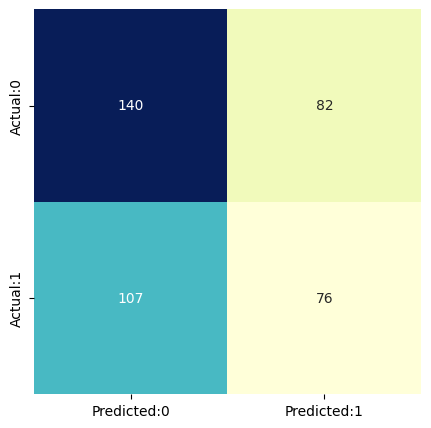

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logres)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [73]:
import xgboost as xgb

In [74]:
xgb_c = xgb.XGBClassifier(
    learning_rate=0.001,
    max_depth=6,
    n_estimators=200,
    random_state=42,
    n_jobs=2
)

In [75]:
xgb_c.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [76]:
pred_xgb_c = xgb_c.predict(X_test)

In [77]:
print(classification_report(y_test, pred_xgb_c))

              precision    recall  f1-score   support

         0.0       0.58      0.84      0.68       222
         1.0       0.57      0.26      0.35       183

    accuracy                           0.58       405
   macro avg       0.57      0.55      0.52       405
weighted avg       0.57      0.58      0.53       405



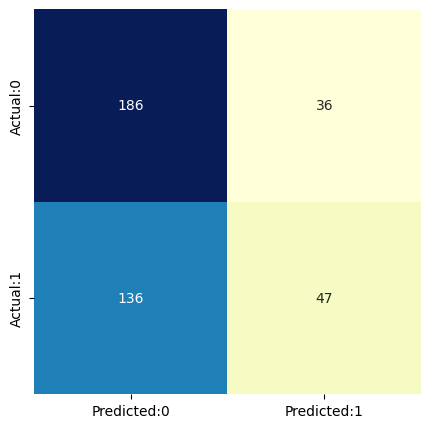

In [78]:
cm = confusion_matrix(y_test, pred_xgb_c)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [79]:
import pickle

In [80]:
with open('model/model.pkl', 'wb') as f:
    pickle.dump(xgb_c, f)